# [Character Level - Multi Layer Perceptron (MLP) Model](https://youtu.be/TCH_1BHY58I?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)

## Import

In [1]:
import torch
import torch.nn.functional as F

import random

import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data & character lookup tables

In [2]:
with open('./data/names_makemore.txt', 'r') as f:
    words = f.readlines()
    words = [name.strip() for name in words]

print(f'[+] Sample words: {words[:3]}')
print(f'''
[+] Count of names : {len(words)}
[+] Minimum num of letter in a name [{words[[len(w) for w in words].index(min([len(w) for w in words]))]}] : {min(len(w) for w in words)}
[+] Maximum num of letter in a name [{words[[len(w) for w in words].index(max([len(w) for w in words]))]}] : {max(len(w) for w in words)}''')

[+] Sample words: ['emma', 'olivia', 'ava']

[+] Count of names : 32033
[+] Minimum num of letter in a name [an] : 2
[+] Maximum num of letter in a name [muhammadibrahim] : 15


In [3]:
chars = sorted(list(set(''.join(words))))

char_to_index = {s:i+1 for i, s in enumerate(chars)}
char_to_index['.'] = 0

index_to_char = {i:s for s, i in char_to_index.items()}

print(f'{char_to_index=}')
print()
print(f'{index_to_char=}')

char_to_index={'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}

index_to_char={1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
# Number of elenemts in the Universe of our model

dim = len(char_to_index.keys())
dim

27

## Create dataset for the model

In [5]:
words[:3]

['emma', 'olivia', 'ava']

In [6]:
# Context length: How many characters do we take to predict the next one?
block_size = 3

X, Y = [], []

verbose = False
for word in words:

    context = [0] * block_size

    if verbose: print(f'\n[+] Target word: {word} | Context: {context}')

    for char in word + '.':
        ix = char_to_index[char]
        X.append(context)
        Y.append(ix)
        
        if verbose: 
            print('\t', ''.join(index_to_char[i] for i in context), '--->', index_to_char[ix], f' [{ix=}] ', f'\tNew Context: {context}')

        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        ...,
        [26, 26, 25],
        [26, 25, 26],
        [25, 26, 24]])

In [9]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [10]:
number_of_training_samples = X.shape[0]
print(f'[+] Number of training samples: {number_of_training_samples}')

[+] Number of training samples: 228146


In [11]:
print(f'[+] Count of all the characters in our dataset: {dim}')

# Lookup Table [Embedding] for our 27 characters in the dataset
# 2 dimentional Embedding
C =  torch.randn((dim, 2))

[+] Count of all the characters in our dataset: 27


In [12]:
C.shape

torch.Size([27, 2])

In [13]:
C[:3]

tensor([[-0.3491,  0.4474],
        [ 0.3041, -0.9160],
        [ 0.0627, -0.0548]])

In [14]:
X.shape

torch.Size([228146, 3])

In [15]:
X[:3]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13]])

In [16]:
# Embedding all the characters with the lookup table

embedding = C[X]

In [17]:
embedding.shape

torch.Size([228146, 3, 2])

In [18]:
embedding[:3]

tensor([[[-0.3491,  0.4474],
         [-0.3491,  0.4474],
         [-0.3491,  0.4474]],

        [[-0.3491,  0.4474],
         [-0.3491,  0.4474],
         [-0.2673, -0.0570]],

        [[-0.3491,  0.4474],
         [-0.2673, -0.0570],
         [ 0.7325,  1.2682]]])

## Scratchpad

In [ ]:
indexing = torch.tensor([
    [0,0,0],
    [0,0,5]
])
indexing.shape

In [ ]:
C[indexing]

In [ ]:
embedding.shape

In [ ]:
embedding[:3, :, :]

In [ ]:
embedding[:3].reshape(-1, 6)

In [ ]:
torch.cat(torch.unbind(embedding[:3], 1), 1)

In [ ]:
embedding[:3].view(3, input_layer_nodes)

## Creating Neural Network Layer

![Image Title](./images/nn_arc3.png)

In [20]:
input_characters      = 3
dim_of_each_character = embedding.shape[-1]
input_layer_nodes     = input_characters * dim_of_each_character
W1_neuron_count       = 100
b1_count              = W1_neuron_count

print(f'[+] Count of input characters to the model   : {input_characters}')
print(f'[+] Dimension of each character              : {dim_of_each_character}')
print(f'[+] Count of input nodes of our model        : {input_layer_nodes}')
print(f'[+] Number of nodes in the first input layer : {W1_neuron_count}')
print(f'[+] Number of biases in the first input layer: {b1_count}')

[+] Count of input characters to the model   : 3
[+] Dimension of each character              : 2
[+] Count of input nodes of our model        : 6
[+] Number of nodes in the first input layer : 100
[+] Number of biases in the first input layer: 100


In [35]:
print('''
---------------------------------------------------------------------------------------------------------------------
                                                    SUMMARY
---------------------------------------------------------------------------------------------------------------------

[+] Input characters from human perspective            = 3 [N, I, K]
[+] Each character is encoded in 2 dim                 = [ N(0.1, 0.2),   I(0.3, 0.4),   K(0.5, 06) ]
[+] Count of input nodes to the model                  = 3 * 2
[+] Unpacked input values to the model                 = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 ]  # Also concatinated
[+] Number of nodes in Layer 1                         = 100
[+] Number of weight parameters (W)                    = 6 * 100 = 600 
    - Each input node connecting to all the nodes in the the first layer of Neural Network
    - Dimension of W1 would be (6, 100)
[+] Each node has one bias also, count                 = 100

[+] No of nodes in output layer                        = 27 (No of characters in our dataset for output prediction)
[+] Number of weight parameters (W)                    = 100 * 27
    - Each input node connecting to all the nodes in the output layer.
    - Dimension of W2 would be (100, 27)
[+] Each node in output layer has one bias also, count = 27
''')


---------------------------------------------------------------------------------------------------------------------
                                                    SUMMARY
---------------------------------------------------------------------------------------------------------------------

[+] Input characters from human perspective            = 3 [N, I, K]
[+] Each character is encoded in 2 dim                 = [ N(0.1, 0.2),   I(0.3, 0.4),   K(0.5, 06) ]
[+] Count of input nodes to the model                  = 3 * 2
[+] Unpacked input values to the model                 = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 ]  # Also concatinated
[+] Number of nodes in Layer 1                         = 100
[+] Number of weight parameters (W)                    = 6 * 100 = 600 
    - Each input node connecting to all the nodes in the the first layer of Neural Network
    - Dimension of W1 would be (6, 100)
[+] Each node has one bias also, count                 = 100

[+] No of nodes in output layer

| SUMMARY WITH AN EXAMPLE | |
| -------- | ------- |
| Input characters from human perspective  | 3 [N, I, K] |
| Each character is encoded in 2 dim | [ N(0.1, 0.2),   I(0.3, 0.4),   K(0.5, 06) ] |
| Count of input nodes to the model    | 3 * 2 |
| Unpacked input values to the model | [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6 ]  # Also concatinated |
| Number of nodes in Layer 1 | 100 |
| Number of weight parameters (W) | 6 * 100 = 600  |
| &emsp;&emsp;&emsp;1. Each input node connecting to all the nodes in the the first layer of Neural Network |
| &emsp;&emsp;&emsp;2. Dimension of W1 would be (6, 100) |
| Each node has one bias also, count | 100 |
| | |
| No of nodes in output layer | 27 (No of characters in our dataset for output prediction) |
| Number of weight parameters (W) | 100 * 27 |
| &emsp;&emsp;&emsp;1. Each input node connecting to all the nodes in the output layer |
| &emsp;&emsp;&emsp;2. Dimension of W2 would be (100, 27) |
| Each node in output layer has one bias also, count | 27 |

In [24]:
# Initialising the Weights and biases

W1 = torch.randn((input_layer_nodes, W1_neuron_count))
b1 = torch.randn(b1_count)

In [25]:
W1.shape

torch.Size([6, 100])

In [26]:
b1.shape

torch.Size([100])

In [27]:
embedding.shape

torch.Size([32, 3, 2])

In [28]:
embedding[:3]

tensor([[[0.5372, 0.4819],
         [0.5372, 0.4819],
         [0.5372, 0.4819]],

        [[0.5372, 0.4819],
         [0.5372, 0.4819],
         [0.0790, 0.1419]],

        [[0.5372, 0.4819],
         [0.0790, 0.1419],
         [1.9998, 0.4914]]])

In [29]:
# All the below results in the same output

h = embedding.reshape(-1, input_layer_nodes)
# h = embedding.view(number_of_training_samples, input_layer_nodes)
# h = torch.cat(torch.unbind(embedding, 1), 1)  # Ineffecient, creates a new tensor 

h = torch.tanh(h @ W1 + b1)

In [30]:
# Why are we reshaping?

In [31]:
h.shape

torch.Size([32, 100])

In [32]:
h[:3]

tensor([[-5.0764e-01,  7.3563e-01, -1.5097e-01, -5.4590e-01,  8.0513e-01,
         -9.3756e-01,  9.8652e-01,  9.8073e-02, -9.5341e-01, -1.0117e-01,
          9.8423e-01,  9.7771e-01, -8.6723e-02, -6.7850e-01, -9.8908e-01,
         -2.4428e-01, -9.0726e-01, -2.8357e-01,  9.6281e-01,  8.7673e-01,
         -9.2048e-01, -4.6646e-01, -9.6051e-01, -9.3338e-01, -9.6986e-01,
          4.5945e-01, -8.6567e-02, -9.8677e-01, -9.3236e-01,  9.7575e-01,
         -3.8124e-01, -9.6884e-01, -3.2271e-01, -9.5687e-01, -1.3603e-01,
         -8.5033e-01, -8.5820e-01,  1.6413e-01, -6.1168e-01, -2.4164e-01,
          7.4713e-01,  2.3269e-01,  7.1546e-01,  7.2417e-01, -5.9217e-01,
         -9.8226e-01, -9.2555e-01, -3.3184e-01,  6.2161e-03, -2.3156e-01,
         -6.6192e-01,  9.9758e-01,  9.7461e-01,  8.7020e-01, -2.9265e-01,
         -3.3398e-01, -6.6620e-01, -4.1342e-01,  3.2196e-01, -8.3239e-01,
          9.6455e-01,  8.8834e-01,  8.9383e-01,  9.9896e-01,  9.0789e-01,
          6.1622e-01,  6.5824e-01,  9.

In [33]:
W1.shape

torch.Size([6, 100])

In [36]:
W2 = torch.randn((W1_neuron_count, dim))
b2 = torch.randn(dim)

In [37]:
W2.shape

torch.Size([100, 27])

In [38]:
b2.shape

torch.Size([27])

In [39]:
W2[:3]

tensor([[-1.3402, -0.2845,  0.6404, -0.9346,  0.1853,  0.6582,  0.1250,  0.3637,
          1.2703,  0.4984, -0.3907,  1.2165,  0.9403,  1.1258, -0.9497,  1.3753,
         -1.7073, -1.6395,  0.7824, -0.8086,  0.2901, -0.8827, -1.6454, -0.8344,
         -0.4886,  1.3559, -0.8858],
        [ 1.9138,  0.3203, -1.2236, -0.3629,  1.4746,  0.6193, -2.0904,  0.3629,
          0.3365, -0.7944, -0.6140,  0.3991,  1.1043,  0.6886, -0.9987, -0.4204,
         -0.8943,  1.1905, -0.6170,  0.4117,  0.4227, -0.9250, -0.0677,  0.0640,
         -0.1714, -0.6733,  0.4050],
        [ 0.6472, -0.0805,  0.0495, -0.6117,  0.6456,  0.9880, -0.7164,  1.1279,
          0.0213,  1.4302, -2.9614, -1.4914,  0.3569, -0.4134, -0.9171,  0.4062,
          0.9235, -0.6367,  0.2969, -0.0855, -1.9445, -0.0896, -0.4357, -0.3700,
          1.6350,  0.5748,  0.7663]])

In [40]:
b2[:3]

tensor([-0.1596,  1.7768, -1.6329])

In [41]:
logits = h @ W2 + b2 

In [42]:
logits.shape

torch.Size([32, 27])

In [72]:
torch.flatten(logits).min().item(), torch.flatten(logits).max().item()

(-21.304649353027344, 25.58248519897461)

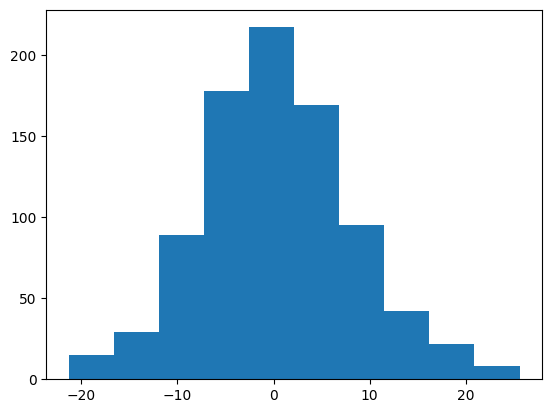

In [73]:
plt.hist(torch.flatten(logits));

In [74]:
counts = logits.exp()  # fake count

In [76]:
torch.flatten(counts).min().item(), torch.flatten(counts).max().item()

(5.591243024127834e-10, 128923516928.0)

In [81]:
len(list(sorted(x.item() for x in torch.flatten(counts))))

864

In [82]:
864/2

432.0

[0.7310653924942017,
 0.7330960035324097,
 0.7529741525650024,
 0.7598239183425903,
 0.7746933102607727,
 0.7832502722740173,
 0.7932390570640564,
 0.816877007484436,
 0.8223203420639038,
 0.8231403827667236,
 0.8384041786193848,
 0.8581687211990356,
 0.8601752519607544,
 0.8880463242530823,
 0.9077925682067871,
 0.9109219312667847,
 0.9620658159255981,
 0.9866657853126526,
 0.9924944639205933,
 1.0146836042404175,
 1.0331777334213257,
 1.0331777334213257,
 1.0331777334213257,
 1.0331777334213257,
 1.0331777334213257,
 1.0389835834503174,
 1.0578948259353638,
 1.0732365846633911,
 1.0901623964309692,
 1.139238715171814,
 1.139238715171814,
 1.139238715171814,
 1.139238715171814,
 1.139238715171814,
 1.1406904458999634,
 1.1686471700668335,
 1.192301869392395,
 1.2042845487594604,
 1.2442766427993774,
 1.248475193977356,
 1.257791519165039,
 1.2865033149719238,
 1.3056827783584595,
 1.318767786026001,
 1.3688180446624756,
 1.3788182735443115,
 1.4268767833709717,
 1.4399733543395996,
 1

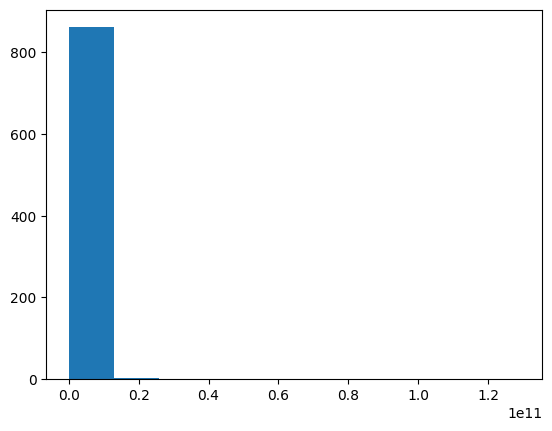

In [77]:
plt.hist(torch.flatten(counts));

In [87]:
probs = counts / counts.sum(1, keepdim=True)

In [88]:
torch.flatten(probs).min().item(), torch.flatten(probs).max().item()

(3.5267048980177205e-20, 0.9999281167984009)

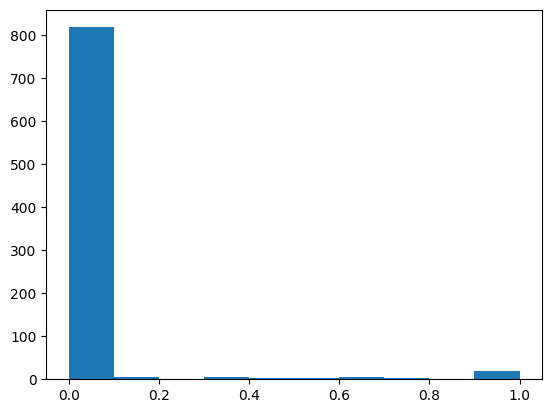

In [89]:
plt.hist(torch.flatten(probs));

## Scratchpad

In [90]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [93]:
number_of_training_samples = h.shape[0]
number_of_training_samples

32

In [94]:
torch.arange(number_of_training_samples)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [97]:
probs[torch.arange(number_of_training_samples), Y]

tensor([3.2798e-06, 2.7559e-03, 4.8079e-05, 2.8833e-15, 3.7467e-10, 6.2816e-11,
        7.4151e-06, 2.2383e-08, 8.8247e-09, 9.5443e-09, 6.5275e-09, 9.3345e-10,
        4.8253e-12, 5.5154e-01, 3.8057e-15, 5.4973e-09, 1.5939e-07, 2.6749e-07,
        1.0691e-08, 3.8696e-05, 3.3637e-12, 5.2456e-06, 1.1109e-03, 3.0924e-06,
        1.5585e-10, 4.5193e-09, 1.1140e-04, 2.1908e-09, 3.1184e-10, 9.9993e-01,
        5.6852e-17, 1.4434e-10])

In [99]:
probs[torch.arange(number_of_training_samples), Y].shape

torch.Size([32])

In [100]:
probs.shape

torch.Size([32, 27])

In [98]:
probs

tensor([[2.5219e-06, 4.8253e-12, 1.0010e-09, 5.8054e-08, 4.2635e-05, 3.2798e-06,
         1.0486e-06, 1.7575e-07, 3.3201e-01, 1.5939e-07, 4.4054e-07, 9.8161e-09,
         1.2844e-04, 6.6611e-01, 3.5620e-06, 6.2816e-11, 8.6584e-07, 1.6871e-09,
         8.5803e-09, 4.5193e-09, 2.5895e-10, 1.1143e-08, 4.4662e-06, 9.4176e-07,
         6.4634e-10, 1.9833e-11, 1.6905e-03],
        [5.4670e-08, 2.3418e-13, 4.5213e-08, 1.1537e-08, 1.8404e-04, 1.2230e-06,
         2.7076e-06, 1.1192e-10, 9.9690e-01, 9.2149e-09, 7.4867e-08, 4.2696e-11,
         1.2092e-04, 2.7559e-03, 1.8810e-06, 8.5776e-09, 9.2177e-08, 2.2308e-10,
         4.2878e-10, 9.7797e-08, 1.9173e-12, 2.4106e-08, 2.2819e-08, 7.1865e-07,
         3.6098e-10, 3.7589e-11, 3.2382e-05],
        [2.4772e-11, 1.0769e-16, 2.8638e-11, 6.7269e-13, 3.0961e-12, 9.0158e-07,
         7.2018e-14, 3.9350e-09, 7.7188e-07, 1.0469e-08, 1.5601e-10, 7.2008e-09,
         1.3332e-14, 4.8079e-05, 1.5577e-08, 4.7432e-19, 1.4132e-10, 9.7755e-12,
         4.4275e-

## Cont...

In [101]:
loss = -probs[torch.arange(number_of_training_samples), Y].log().mean()

In [102]:
loss

tensor(17.5703)

## Putting it all together - 1 

In [41]:
X.shape, Y.shape  # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [62]:
input_characters      = 3
dim_of_each_character = embedding.shape[-1]
input_layer_nodes     = input_characters * dim_of_each_character
W1_neuron_count       = 100
b1_count              = W1_neuron_count

In [63]:
g = torch.Generator().manual_seed(2147483647)  # For reproducibility

C =  torch.randn((dim, 2), generator=g)

W1 = torch.randn((input_layer_nodes, W1_neuron_count), generator=g)
b1 = torch.randn(b1_count, generator=g)

W2 = torch.randn((W1_neuron_count, dim), generator=g)
b2 = torch.randn(dim, generator=g)

parameters = [C, W1, b1, W2, b2]

In [44]:
sum(p.nelement() for p in parameters)  # Number of parameters in total

3481

In [45]:
for p in parameters:
    p.requires_grad = True

### Normal

In [45]:
no_of_epoc = 101

for epoc in range(no_of_epoc):

    # FORWARD PASS
    
    embedding = C[X]  # [32, 3, 2]
    h = embedding.reshape(-1, input_layer_nodes)  # [32, 6]
    h = torch.tanh(h @ W1 + b1)  # [32, 100]
    logits = h @ W2 + b2  # [32, 27]
    
    # counts = logits.exp()  # fake count  # [32, 27]
    # probs = counts / counts.sum(1, keepdim=True)  # [32, 27]
    # loss = -probs[torch.arange(number_of_training_samples), Y].log().mean()
    
    # All the above 3 lines can be replaced with below single line, which basically does the same thing.
    # Because we are usign cross entropy, we get below benifits:
    #    - the forward pass is much efficient 
    #    - the backwoard pass is also much efficient
    #    - numerically stable process
    loss = F.cross_entropy(logits, Y)
    
    
    # BACKWARD PASS
    
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad
    
    if epoc%10==0:
        print(f'[+] Epoc: {epoc:<5} | Loss: {round(loss.item(), 4)}')


[+] Epoc: 0   | Loss: 19.5052
[+] Epoc: 10  | Loss: 10.7096
[+] Epoc: 20  | Loss: 8.3292
[+] Epoc: 30  | Loss: 6.795
[+] Epoc: 40  | Loss: 5.8031
[+] Epoc: 50  | Loss: 5.1055
[+] Epoc: 60  | Loss: 4.5874
[+] Epoc: 70  | Loss: 4.2026
[+] Epoc: 80  | Loss: 3.9281
[+] Epoc: 90  | Loss: 3.7287
[+] Epoc: 100 | Loss: 3.5755


### Mini batch version

In [46]:
no_of_epoc = 101

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()
    
    for p in parameters:
        p.data += -0.1 * p.grad
    
    if epoc%10==0:
        print(f'[+] Epoc: {epoc:<3} | Loss: {round(loss.item(), 4)}')

[+] Epoc: 0   | Loss: 3.1368
[+] Epoc: 10  | Loss: 3.1352
[+] Epoc: 20  | Loss: 3.5291
[+] Epoc: 30  | Loss: 2.3907
[+] Epoc: 40  | Loss: 3.0332
[+] Epoc: 50  | Loss: 3.3525
[+] Epoc: 60  | Loss: 3.6675
[+] Epoc: 70  | Loss: 2.3661
[+] Epoc: 80  | Loss: 3.6176
[+] Epoc: 90  | Loss: 3.1297
[+] Epoc: 100 | Loss: 3.2255


### Find good Learning rate

In [64]:
no_of_epoc = 5001

count_of_learning_rate = no_of_epoc

In [65]:
lre = torch.linspace(-3, 0, count_of_learning_rate)
lrs = 10**lre

In [66]:
lre[:10]

tensor([-3.0000, -2.9994, -2.9988, -2.9982, -2.9976, -2.9970, -2.9964, -2.9958,
        -2.9952, -2.9946])

In [67]:
lrs[:10]

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010,
        0.0010])

In [68]:
for p in parameters:
    p.requires_grad = True

In [69]:
track_lr   = []
track_loss = []
track_lre  = []

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()

    # UPDATE
    learning_rate = epoc
    learning_rate = lrs[learning_rate]
    
    for p in parameters:
        p.data += -learning_rate * p.grad

    # TRACKING
    track_lr.append(learning_rate)
    track_loss.append(loss.item())
    track_lre.append(lre[epoc])
    
    if epoc%100==0:
        print(f'[+] Epoc: {epoc:<5} | lr: {round(learning_rate.item(), 4):<7} | Loss: {round(loss.item(), 4)}')

[+] Epoc: 0     | lr: 0.001   | Loss: 18.562
[+] Epoc: 100   | lr: 0.0011  | Loss: 17.3289
[+] Epoc: 200   | lr: 0.0013  | Loss: 12.9705
[+] Epoc: 300   | lr: 0.0015  | Loss: 13.088
[+] Epoc: 400   | lr: 0.0017  | Loss: 14.5135
[+] Epoc: 500   | lr: 0.002   | Loss: 11.6533
[+] Epoc: 600   | lr: 0.0023  | Loss: 13.9044
[+] Epoc: 700   | lr: 0.0026  | Loss: 10.0326
[+] Epoc: 800   | lr: 0.003   | Loss: 9.0476
[+] Epoc: 900   | lr: 0.0035  | Loss: 9.7132
[+] Epoc: 1000  | lr: 0.004   | Loss: 6.7655
[+] Epoc: 1100  | lr: 0.0046  | Loss: 6.2737
[+] Epoc: 1200  | lr: 0.0052  | Loss: 5.0726
[+] Epoc: 1300  | lr: 0.006   | Loss: 6.5179
[+] Epoc: 1400  | lr: 0.0069  | Loss: 5.5851
[+] Epoc: 1500  | lr: 0.0079  | Loss: 5.6074
[+] Epoc: 1600  | lr: 0.0091  | Loss: 3.6322
[+] Epoc: 1700  | lr: 0.0105  | Loss: 3.8478
[+] Epoc: 1800  | lr: 0.012   | Loss: 3.8883
[+] Epoc: 1900  | lr: 0.0138  | Loss: 4.1709
[+] Epoc: 2000  | lr: 0.0158  | Loss: 3.5801
[+] Epoc: 2100  | lr: 0.0182  | Loss: 3.3829
[+] 

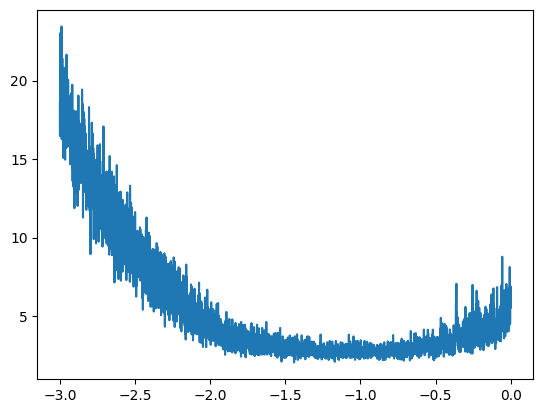

In [71]:
plt.plot(track_lre, track_loss)

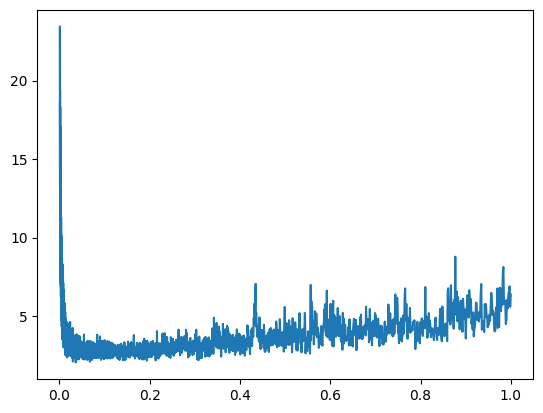

In [70]:
plt.plot(track_lr, track_loss)

From the above chart we can see that a good learning rate lies between 0.1 to 0.2

### Final run post we find a good learning rate

In [56]:
no_of_epoc = 5001

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    
    # BACKWARD PASS
    for p in parameters:
        p.grad = None
    
    loss.backward()

    # UPDATE with decay
    for p in parameters:
        # p.data += -0.1 * p.grad
        # p.data += -0.01 * p.grad
        p.data += -0.005 * p.grad
    
    if epoc%100==0:
        print(f'[+] Epoc: {epoc:<5} | Loss: {round(loss.item(), 4)}')

[+] Epoc: 0     | Loss: 3.2478
[+] Epoc: 100   | Loss: 2.5292
[+] Epoc: 200   | Loss: 2.3528
[+] Epoc: 300   | Loss: 2.4895
[+] Epoc: 400   | Loss: 2.702
[+] Epoc: 500   | Loss: 2.5506
[+] Epoc: 600   | Loss: 2.7935
[+] Epoc: 700   | Loss: 2.3759
[+] Epoc: 800   | Loss: 2.7065
[+] Epoc: 900   | Loss: 2.386
[+] Epoc: 1000  | Loss: 2.4793
[+] Epoc: 1100  | Loss: 2.4899
[+] Epoc: 1200  | Loss: 2.6834
[+] Epoc: 1300  | Loss: 2.2638
[+] Epoc: 1400  | Loss: 2.6412
[+] Epoc: 1500  | Loss: 2.8678
[+] Epoc: 1600  | Loss: 2.4635
[+] Epoc: 1700  | Loss: 2.5211
[+] Epoc: 1800  | Loss: 2.5001
[+] Epoc: 1900  | Loss: 2.6987
[+] Epoc: 2000  | Loss: 2.6926
[+] Epoc: 2100  | Loss: 2.3703
[+] Epoc: 2200  | Loss: 2.4619
[+] Epoc: 2300  | Loss: 2.3193
[+] Epoc: 2400  | Loss: 2.6391
[+] Epoc: 2500  | Loss: 2.3305
[+] Epoc: 2600  | Loss: 2.2513
[+] Epoc: 2700  | Loss: 2.3265
[+] Epoc: 2800  | Loss: 2.3703
[+] Epoc: 2900  | Loss: 2.5903
[+] Epoc: 3000  | Loss: 2.402
[+] Epoc: 3100  | Loss: 2.2536
[+] Epoc: 3

In [73]:
# Loss on full data

embedding = C[X]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

5.575146675109863

## Train split, Dev/Validation split, Test split
80%, 10%, 10%

In [1]:
def create_train_val_test_split(lst):
    total_len = len(lst)
    first_end = int(total_len * 0.8)
    second_end = int(total_len * 0.9)
    
    train_set = lst[:first_end]
    val_set = lst[first_end:second_end]
    test_set = lst[second_end:]
    
    return train_set, val_set, test_set

In [13]:
# SPLITTING THE DATA IN TRAINING, VALIDATION AND TEST SETS

random.seed(42)
random.shuffle(words)

train_set, val_set, test_set = create_train_val_test_split(lst=words)

In [14]:
len(words), len(train_set) + len(val_set) + len(test_set)

(32033, 32033)

In [19]:
def build_dataset(words, block_size=3):
    # Context length: How many characters do we take to predict the next one?
    
    X, Y = [], []
    
    verbose = False
    for word in words:
    
        context = [0] * block_size
    
        for char in word + '.':
            ix = char_to_index[char]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]  # crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    s1, s2 = X.shape
    s = Y.shape[0]
    
    print(f'X({s1}, {s2}) | Y({s})')
    
    return X, Y

In [21]:
print('*** FULL DATA ***    ', end=' | ')
X, Y = build_dataset(train_set)

print('*** TRAIN ***        ', end=' | ')
X_train, Y_train           = build_dataset(train_set)

print('*** VALIDATION ***   ', end=' | ')
X_validation, Y_validation = build_dataset(val_set)

print('*** TEST ***         ', end=' | ')
X_test, Y_test             = build_dataset(test_set)

*** FULL DATA ***     | X(182625, 3) | Y(182625)
*** TRAIN ***         | X(182625, 3) | Y(182625)
*** VALIDATION ***    | X(22655, 3) | Y(22655)
*** TEST ***          | X(22866, 3) | Y(22866)


In [22]:
block_size            = 3
input_characters      = 3
W1_neuron_count       = 100
dim_of_each_character = 2
input_layer_nodes     = input_characters * dim_of_each_character
b1_count              = W1_neuron_count

In [23]:
g = torch.Generator().manual_seed(2147483647)  # For reproducibility

C =  torch.randn((dim, dim_of_each_character), generator=g)

W1 = torch.randn((input_layer_nodes, W1_neuron_count), generator=g)
b1 = torch.randn(b1_count, generator=g)

W2 = torch.randn((W1_neuron_count, dim), generator=g)
b2 = torch.randn(dim, generator=g)

parameters = [C, W1, b1, W2, b2]

In [24]:
C.shape, W1.shape, b1.shape, W2.shape, b2.shape

(torch.Size([27, 2]),
 torch.Size([6, 100]),
 torch.Size([100]),
 torch.Size([100, 27]),
 torch.Size([27]))

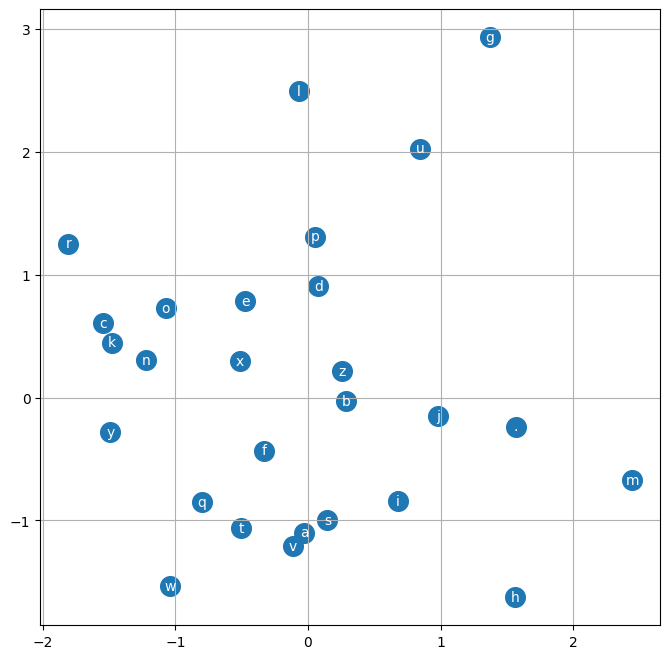

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(
        C[i, 0].item(),
        C[i, 1].item(),
        index_to_char[i],
        ha='center',
        va='center',
        color='white'
    )
plt.grid('minor')

In [26]:
sum(p.nelement() for p in parameters)  # Number of parameters in total

3481

In [27]:
for p in parameters:
    p.requires_grad = True

In [28]:
no_of_epoc = 50_001
lr         = 0.1

track_loss, track_steps = [], []

for epoc in range(no_of_epoc):

    # MINI-BATCH CONSTRUCT
    ix = torch.randint(0, X_train.shape[0], (32,))

    # FORWARD PASS
    embedding = C[X_train[ix]]
    h = embedding.reshape(-1, input_layer_nodes)
    h = torch.tanh(h @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    
    
    # BACKWARD PASS
    for p in parameters: p.grad = None
    
    loss.backward()

    if epoc%10_000==0: lr /= 2
        
    for p in parameters: p.data += -lr * p.grad

    # TRACKING
    track_loss.append(loss.log10().item())
    track_steps.append(epoc)
    
    if epoc%5000==0:
        print(f'[+] Epoc: {epoc:<5} | lr: {round(lr, 4):<7} | Loss: {round(loss.item(), 4)}')

# print(f'\n[+] LOSS: {loss.item()}')

[+] Epoc: 0     | lr: 0.05    | Loss: 17.5298
[+] Epoc: 5000  | lr: 0.05    | Loss: 2.2917
[+] Epoc: 10000 | lr: 0.025   | Loss: 2.4893
[+] Epoc: 15000 | lr: 0.025   | Loss: 2.2118
[+] Epoc: 20000 | lr: 0.0125  | Loss: 2.4747
[+] Epoc: 25000 | lr: 0.0125  | Loss: 2.4668
[+] Epoc: 30000 | lr: 0.0063  | Loss: 2.6344
[+] Epoc: 35000 | lr: 0.0063  | Loss: 2.3544
[+] Epoc: 40000 | lr: 0.0031  | Loss: 2.4029
[+] Epoc: 45000 | lr: 0.0031  | Loss: 2.2599
[+] Epoc: 50000 | lr: 0.0016  | Loss: 2.7309


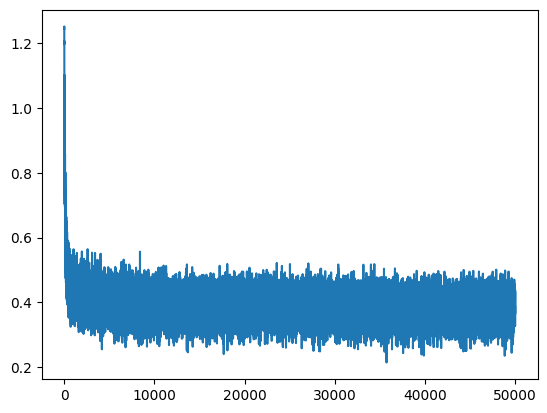

In [29]:
plt.plot(track_steps, track_loss)

In [30]:
# Loss on Validation set

embedding = C[X_validation]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_validation)
loss.item()

2.4086523056030273

In [31]:
# Loss on Train set

embedding = C[X_train]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
loss.item()

2.411569356918335

In [32]:
# Loss on Test set

embedding = C[X_test]
h = embedding.reshape(-1, input_layer_nodes)
h = torch.tanh(h @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_test)
loss.item()

2.414377450942993

### Visualising character embedding 

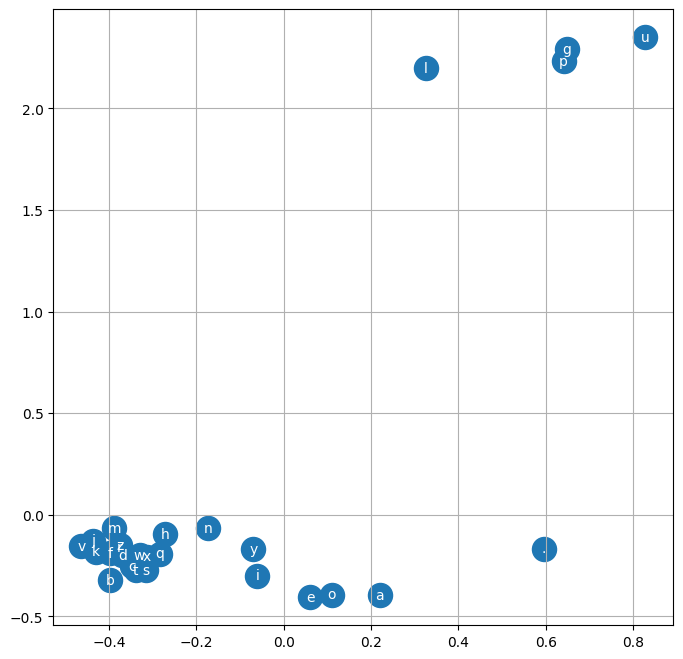

In [33]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=300)
for i in range(C.shape[0]):
    plt.text(
        C[i, 0].item(),
        C[i, 1].item(),
        index_to_char[i],
        ha='center',
        va='center',
        color='white'
    )
plt.grid('minor')

## Sample from the model

In [34]:
g = torch.Generator().manual_seed(2147483647 + 10)  # For reproducibility

for _ in range(20):
    out = []
    context = [0]*block_size  # initialize with "..."
    
    while True:
        emb = C[torch.tensor([context])]  # (1, block_size, d)
        h = torch.tanh(emb.reshape(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)

        if ix == 0:
            break

    print(f'[+] {"".join(index_to_char[i] for i in out)}')

[+] mria.
[+] mayan.
[+] seelend.
[+] ryalorenmastendrleg.
[+] azehedieliih.
[+] mioren.
[+] ede.
[+] suso.
[+] nar.
[+] kay.
[+] kohlyegin.
[+] shdenrishiries.
[+] kin.
[+] renlynnan.
[+] pucoyu.
[+] zen.
[+] dar.
[+] yarue.
[+] ehg.
[+] kay.
